# N03. Propinas Difusas

__Borja González Seoane, Computación Inteligente y Ética de la IA. Curso 2022-23__


## Preámbulo

El problema de la propina se puede utilizar para ilustrar el poder de los principios de la lógica difusa para generar comportamientos complejos a partir de un conjunto compacto e intuitivo de reglas expertas.

Se propone crear un sistema de control difuso que modele la forma en que se decide cómo dar propina en un restaurante. Al dejar propina, se tiene en cuenta la calidad del servicio y de la comida, valorada entre 0 y 10. A partir de ahí, se deja una propina de entre el 0 y el 25 %.

Se empleará la librería Scikit-Fuzzy:

```sh
pip install scikit-fuzzy numpy  # También se instala NumPy
```

In [3]:
from typing import Tuple

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Formulación de variables y funciones de pertenencia

In [4]:
# Variables como antecendentes y consecuentes
v_calidad = ctrl.Antecedent(np.arange(0, 11, 1), "calidad")
v_servicio = ctrl.Antecedent(np.arange(0, 11, 1), "servicio")
v_propina =  ctrl.Consequent(np.arange(0, 26, 1), "propina")

c:\Users\G513\University\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


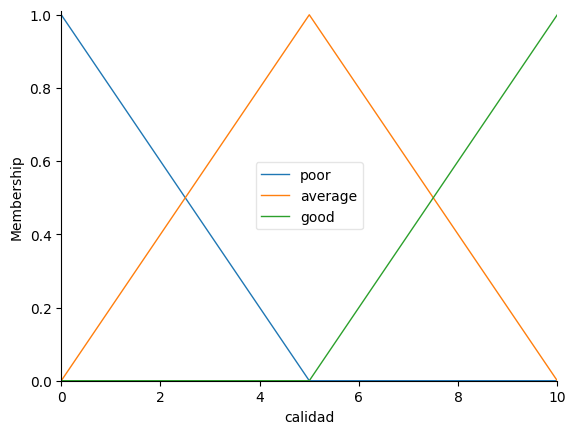

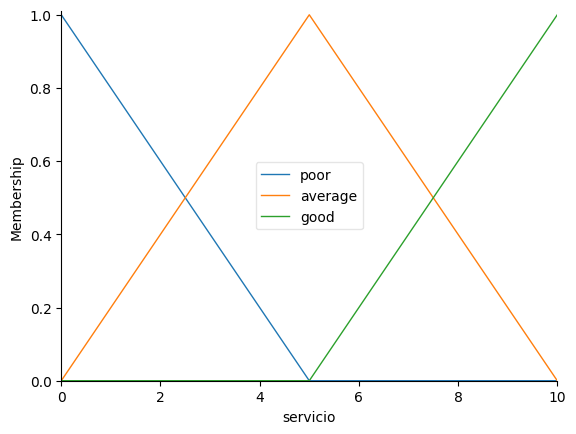

In [5]:
# Funciones de pertenencia automáticas. Se definen 3 funciones de pertenencia: pobres, medias y buenas
v_calidad.automf(3)
v_servicio.automf(3)

v_calidad.view()
v_servicio.view()

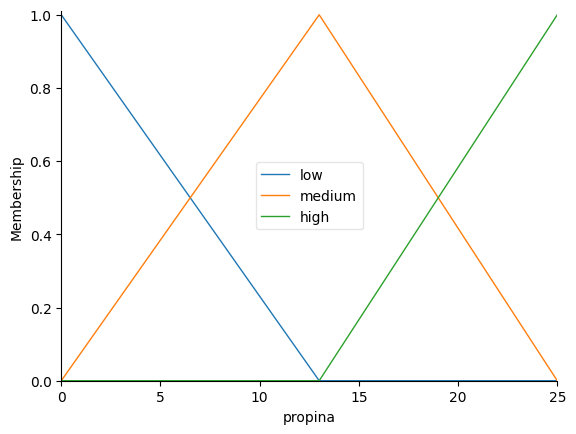

In [6]:
# Otra forma de definir las funciones de pertenencia, especificando los puntos de corte
v_propina["low"] = fuzz.trimf(v_propina.universe, [0, 0, 13])
v_propina["medium"] = fuzz.trimf(v_propina.universe, [0, 13, 25])
v_propina["high"] = fuzz.trimf(v_propina.universe, [13, 25, 25])

v_propina.view()

In [7]:
print(v_propina.defuzzify_method)

centroid


## Reglas difusas

(<Figure size 640x480 with 1 Axes>, <Axes: >)

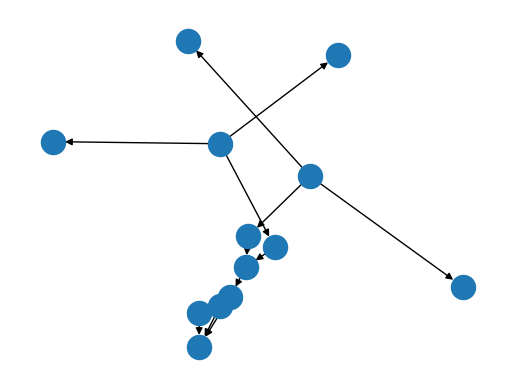

In [31]:
# Si la calidad de la comida es baja o el servicio es pobre, entonces la propina será baja
regla1 = ctrl.Rule(v_calidad["poor"] | v_servicio["poor"], v_propina["low"])

# Si la calidad o el servicio es medio, entonces la propina será media
regla2 = ctrl.Rule(v_calidad["average"] | v_servicio["average"], v_propina["medium"])

# Si el servicio es bueno y la calidad de la comida es buena, entonces la propina será alta
regla3 = ctrl.Rule(v_calidad["good"] | v_servicio["good"], v_propina["high"])

regla1.view()

## Creación del controlador

A partir de las reglas, podemos definir el controlador difuso.

In [24]:
motor_de_inferencias =  ctrl.ControlSystem([regla1, regla2, regla3])

## Inferencia

Se puede emplear el sistema de control difuso para realizar inferencias.

In [25]:
def calcula_inferencia_propina(
c: float,
s: float,
mi=motor_de_inferencias
) -> Tuple[ctrl.ControlSystemSimulation, float]:
    # Es necesario crear un objeto ControlSystemSimulation para simular el sistema de control
    propinas_infer = ctrl.ControlSystemSimulation(mi)
    propinas_infer.input["calidad"] = c
    propinas_infer.input["servicio"] = s
    propinas_infer.compute()
    
    return propinas_infer, propinas_infer.output["propina"]

In [26]:
# Llamadas equivalentes
calcula_inferencia_propina(c=1.3, s=3.5)
calcula_inferencia_propina(s=3.5, c=1.3)
calcula_inferencia_propina(1.3, 3.5)
calcula_inferencia_propina(1.3,3.5, motor_de_inferencias)
calcula_inferencia_propina(1.3, 3.5, mi=motor_de_inferencias)

(<skfuzzy.control.controlsystem.ControlSystemSimulation at 0x2ac5b82ced0>,
 10.594455161877034)

Propina: 13.48


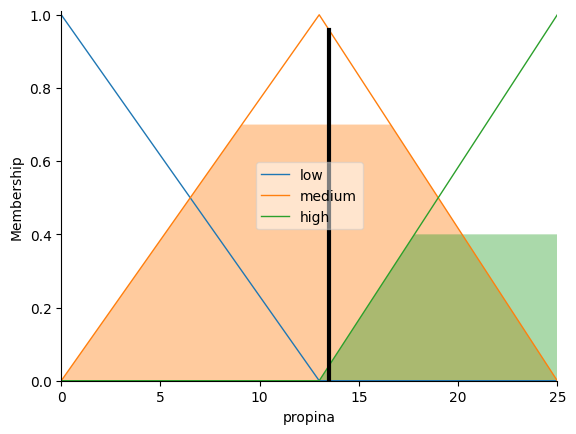

In [27]:
infer, propina = calcula_inferencia_propina(c=6.5, s=7)

print(f"Propina: {propina:.2f}")
v_propina.view(sim=infer)

## Ejercicios

1. Compútese la propina resultante para un servicio de 5 sobre 10 y una calidad de 8 sobre 10.
1. Compútese la propina resultante para un servicio de 9 sobre 10 y una calidad de 8.5 sobre 10.
3. Se han empleado 3 funciones de pertenencia automáticas para las variables _calidad_ y _servicio_. Investigue en la documentación de la librería Scikit-Fuzzy cómo trabajar con una mayor granularidad a este respecto, pasando a emplear más definiciones intermedias entre _pobre_, _medio_, etc. Ajuste las reglas. Vuelva a revisar las propinas resultantes y compare ambas configuraciones del controlador.
4. Investigue cómo fijar etiquetas personalizadas para las funciones de pertenencia de una variable.